In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
from skimage.transform import resize
from imgaug import augmenters as iaa
from keras.utils import plot_model, to_categorical
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

/home/jun3/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
path_to_train_img = './input/train/'
data_info = pd.read_csv('./input/train.csv')

In [3]:
data_info.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [4]:
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

In [5]:
data_info.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [6]:
len(data_info)

31072

In [7]:
dataset_info_lst = []
for ID, labels in zip(data_info['Id'], data_info['Target'].str.split(' ')):
    dataset_info_lst.append({'path': os.path.join(path_to_train_img, ID), 'labels': np.array([int(label) for label in labels])})
train_dataset_info = np.array(dataset_info_lst)

In [8]:
### The function below converts a list of labels into 28 element arrays 
### (corresponding to 28 classes of subcellular localizations). 

def convert_to_categorical(label, num_classes=28):
    cat_label = []
    for i in label:
        tmp = to_categorical(i, num_classes=num_classes).reshape(1, -1)
        cat_label.append(tmp)

    cat_label = np.array(cat_label)
    return np.sum(cat_label, axis=0, keepdims=True)[0][0]  # return final multi-class label

In [9]:
for i in dataset_info_lst:
    i['labels'] = convert_to_categorical(i['labels'])

In [10]:
dataset_info_df = pd.DataFrame(dataset_info_lst)

In [11]:
dataset_info_df.head()

,labels,path
0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",./input/train/00070df0-bbc3-11e8-b2bc-ac1f6b64...
1,"[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",./input/train/000a6c98-bb9b-11e8-b2b9-ac1f6b64...
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",./input/train/000a9596-bbc4-11e8-b2bc-ac1f6b64...
3,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",./input/train/000c99ba-bba4-11e8-b2b9-ac1f6b64...
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",./input/train/001838f8-bbca-11e8-b2bc-ac1f6b64...


In [12]:
label_lst = ["Nucleoplasm",  
            "Nuclear membrane",   
            "Nucleoli",   
            "Nucleoli fibrillar center",   
            "Nuclear speckles",
            "Nuclear bodies",   
            "Endoplasmic reticulum",   
            "Golgi apparatus",   
            "Peroxisomes",   
            "Endosomes",   
            "Lysosomes",   
            "Intermediate filaments",   
            "Actin filaments",   
            "Focal adhesion sites",   
            "Microtubules",   
            "Microtubule ends",   
            "Cytokinetic bridge",   
            "Mitotic spindle",   
            "Microtubule organizing center",   
            "Centrosome",   
            "Lipid droplets",   
            "Plasma membrane",   
            "Cell junctions",   
            "Mitochondria",   
            "Aggresome",   
            "Cytosol",   
            "Cytoplasmic bodies",   
            "Rods & rings"]

In [13]:
for i in range(len(dataset_info_df)):
    for idx, name in enumerate(label_lst):
        dataset_info_df.loc[i, name] = dataset_info_df.loc[i, 'labels'][idx]

In [14]:
dataset_info_df.head(2)

,labels,path,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",./input/train/00070df0-bbc3-11e8-b2bc-ac1f6b64...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",./input/train/000a6c98-bb9b-11e8-b2b9-ac1f6b64...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
dataset_info_df2 = dataset_info_df.copy()

In [16]:
dataset_info_df2.drop(['labels', 'path'], axis = 1, inplace=True)

In [19]:
label_counts = dataset_info_df2.sum(axis=0).sort_values(ascending=False)
label_counts

Nucleoplasm                      12885.0
Cytosol                           8228.0
Plasma membrane                   3777.0
Nucleoli                          3621.0
Mitochondria                      2965.0
Golgi apparatus                   2822.0
Nuclear bodies                    2513.0
Nuclear speckles                  1858.0
Nucleoli fibrillar center         1561.0
Centrosome                        1482.0
Nuclear membrane                  1254.0
Intermediate filaments            1093.0
Microtubules                      1066.0
Endoplasmic reticulum             1008.0
Microtubule organizing center      902.0
Cell junctions                     802.0
Actin filaments                    688.0
Focal adhesion sites               537.0
Cytokinetic bridge                 530.0
Cytoplasmic bodies                 328.0
Aggresome                          322.0
Mitotic spindle                    210.0
Lipid droplets                     172.0
Peroxisomes                         53.0
Endosomes       

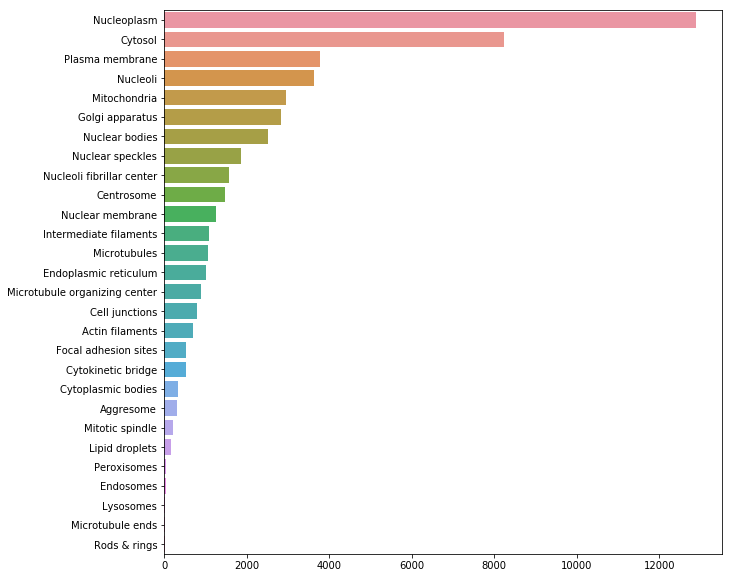

In [21]:
plt.figure(figsize=(10, 10))
sns.barplot(label_counts.values, label_counts.index)

Very few proteins are labeled to be at peroxisomes, endosomes, lysosomes, microtubule ends, and rods & rings.

In [23]:
dataset_info_df2['total target number'] = dataset_info_df2.sum(axis=1)
target_vc = dataset_info_df2['total target number'].value_counts()

In [25]:
target_vc 

1.0    15126
2.0    12485
3.0     3160
4.0      299
5.0        2
Name: total target number, dtype: int64

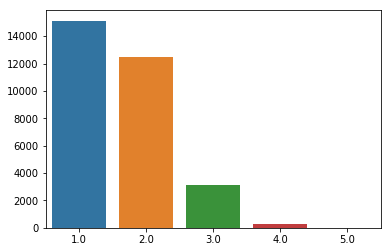

In [26]:
sns.barplot(target_vc.index, target_vc.values)

Most proteins are labeled at one or two locations.  Very few proteins are localized at 4 or more locations. 

In [28]:
dataset_info_df['path'][0:4]

0    ./input/train/00070df0-bbc3-11e8-b2bc-ac1f6b64...
1    ./input/train/000a6c98-bb9b-11e8-b2b9-ac1f6b64...
2    ./input/train/000a9596-bbc4-11e8-b2bc-ac1f6b64...
3    ./input/train/000c99ba-bba4-11e8-b2b9-ac1f6b64...
Name: path, dtype: object

In [29]:
from scipy.misc import imread

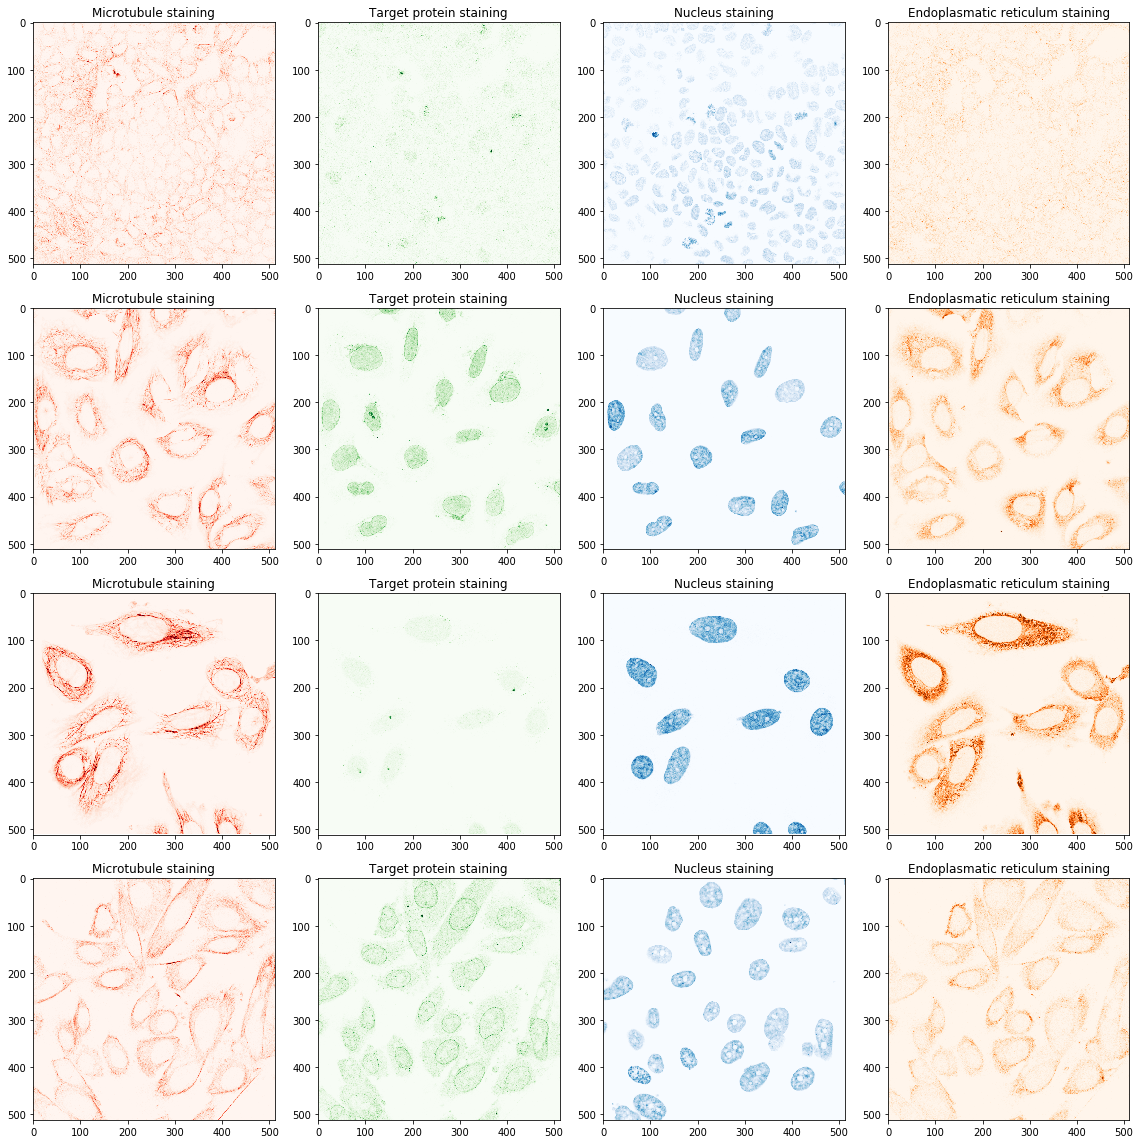

In [43]:
# Plot first 4 examples of images

fig, ax = plt.subplots(4, 4, figsize=(16, 16))

for idx, ID in enumerate(dataset_info_df['path'][0:4]):
    image_red = skimage.io.imread(ID+'_red.png') # label microtubules
    image_yellow = skimage.io.imread(ID+'_yellow.png') # label endoplasmatic reticulum
    image_green = skimage.io.imread(ID+'_green.png') # target protein structure
    image_blue = skimage.io.imread(ID+'_blue.png') # nuclei

    ax[idx,0].imshow(image_red, cmap='Reds')
    ax[idx,0].set_title("Microtubule staining")
    ax[idx,1].imshow(image_green, cmap='Greens')
    ax[idx,1].set_title("Target protein staining")
    ax[idx,2].imshow(image_blue, cmap='Blues')
    ax[idx,2].set_title("Nucleus staining")
    ax[idx,3].imshow(image_yellow, cmap='Oranges')
    ax[idx,3].set_title("Endoplasmatic reticulum staining")
    
plt.tight_layout()